In [1]:
import numpy as np
import pandas as pd 

# USA Case

## Data prep

In [2]:
a = pd.read_csv('covid-19-data-master/us-states.csv')
states = a[a['date']=='2020-04-22']
states = states.iloc[:,[1,4]]
states.tail()

,state,deaths
2828,Virginia,349
2829,Washington,696
2830,West Virginia,29
2831,Wisconsin,247
2832,Wyoming,6


In [3]:
data = pd.read_csv('data.csv')
data = data.iloc[:,[1, 2, -1]]
data.columns = ['state', 'population', 'population density']


In [4]:
temp = pd.read_csv('110-tavg-202003-1.csv')

newloc = []
for i in temp['Location'].values:
    newloc.append(i.split(' CD 1.', 1)[0])
temp['Location'] = newloc 

indexxxx = []
for i, j in zip(temp.index, temp['Location']):
    if 'CD' not in j:
        indexxxx.append(i)

temp = temp.iloc[[0,   8,  15,  24,  31,  36,  39,  41,  48,  57,  67,  76,  85,
        94, 103, 107, 116, 119, 127, 130, 140, 149, 159, 165, 172, 180,
       184, 186, 189, 197, 207, 215, 224, 234, 243, 252, 262, 263, 270,
       279, 283, 293, 300, 303, 309, 319, 325, 334], [1, 2]]
temp.columns = ['state', 'temperature']

## Abs deaths

In [5]:
merge1 = states.merge(data)
merge2 = merge1.merge(temp)
merge2['deaths per M'] = merge2['deaths']/merge2['population']*1000000
merge2.drop('deaths', axis=1, inplace=True)


### Regressor Abs

In [6]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate


ETR = ExtraTreesRegressor() 


X = merge2.iloc[:,[1, 2, 3]]

Y = merge2.iloc[:,[4]]



cv_results = cross_validate(ETR, X, Y, cv=5, scoring='neg_mean_absolute_error')


/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: Dat

In [7]:
cv_results['test_score'].mean()

-85.3570713077242

In [8]:
cv_results['test_score']

array([-118.0049854 ,  -93.18773938, -120.89885292,  -72.97659799,
        -21.71718085])

In [9]:
ETR.fit(X, Y)


/home/adelgado/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

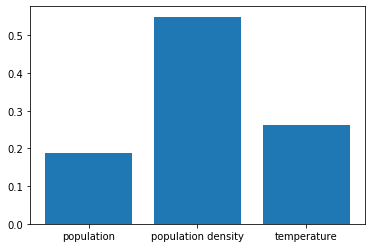

In [10]:
from matplotlib import pyplot

pyplot.bar(X.columns, ETR.feature_importances_)
pyplot.show()

## Deaths per M and filter

In [11]:
merge1 = states.merge(data)
merge2 = merge1.merge(temp)
merge2['deaths per M'] = merge2['deaths']/merge2['population']*1000000
merge2.drop('deaths', axis=1, inplace=True)
merge2 = merge2[merge2['state']!='New York']

### Regressor Abs

In [12]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate


ETR = ExtraTreesRegressor() 


X = merge2.iloc[:,[1, 2, 3]]

Y = merge2.iloc[:,[-1]]



cv_results = cross_validate(ETR, X, Y, cv=5, scoring='neg_mean_absolute_error')


/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: Dat

In [13]:
cv_results['test_score'].mean()

-55.55159890627027

In [14]:
cv_results['test_score']

array([-58.16027798, -89.57371559, -61.23109736, -44.22691141,
       -24.56599219])

In [15]:
ETR.fit(X, Y)


/home/adelgado/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

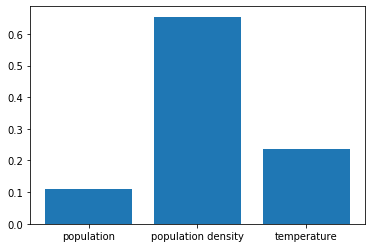

In [16]:
from matplotlib import pyplot

pyplot.bar(X.columns, ETR.feature_importances_)
pyplot.show()

## Normalized Data

### Regressor Abs

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler

ETR = ExtraTreesRegressor() 


minmaxscaler = MinMaxScaler()
NewX = minmaxscaler.fit_transform(X)
NewX = pd.DataFrame(NewX, columns=X.columns)

Y = merge2.iloc[:,[-1]]



cv_results = cross_validate(ETR, NewX, Y, cv=5, scoring='neg_mean_absolute_error')


/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/adelgado/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: Dat

In [18]:
cv_results['test_score'].mean()

-56.54644861080148

In [19]:
cv_results['test_score']

array([-63.6555359 , -84.36801309, -62.21956513, -50.09248862,
       -22.39664032])

In [20]:
ETR.fit(X, Y)


/home/adelgado/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

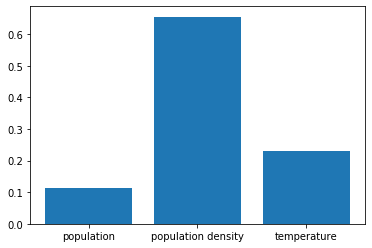

In [21]:
from matplotlib import pyplot

pyplot.bar(X.columns, ETR.feature_importances_)
pyplot.show()

## Representation USA

In [22]:
from bokeh.plotting import figure, show

In [23]:
ETR.fit(NewX[7:], Y[7:])

/home/adelgado/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [24]:
import sklearn

In [25]:
minmaxscaler = sklearn.preprocessing.MinMaxScaler()
NewX = minmaxscaler.fit_transform(X)
NewX = pd.DataFrame(NewX, columns=X.columns)

In [26]:
p = figure(plot_width=1600, plot_height=800, title='Deaths/M vs Temperature / Population Density', x_axis_label='Temperature / Population Density', y_axis_label='Deaths/M (ln)')
p.circle(NewX['temperature'].values/NewX['population density'], np.log(Y['deaths per M'].values), color='black', size=15, alpha=1, legend='Data')

show(p)

In [27]:
p = figure(plot_width=1600, plot_height=800, title='Prediction over 10 last states Deaths/M vs Temperature / Population Density', x_axis_label='Temperature / Population Density', y_axis_label='Deaths/M (ln)')
p.circle(NewX['temperature'][:7].values/NewX['population density'][:7], np.log(Y['deaths per M'][:7].values), color='black', size=15, alpha=1, legend='Data')
p.circle(NewX['temperature'][:7].values/NewX['population density'][:7], np.log(np.ravel(ETR.predict(X[:7]))), color='red', size=15, alpha=1, legend='Prediction')

show(p)